<a href="https://colab.research.google.com/github/suelen-prs/EBAC/blob/main/mod12_ex02_transforma%C3%A7%C3%B5es_em_X_e_Y.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Regressão 01 - tarefa 02 - transformações em X e Y

### 1. Melhorando o ajuste no percentual de gorjetas

a. Vamos partir do modelo feito na última tarefa, o que relaciona ```tip_pct``` e ```net_bill```. Carregue a base, os pacotes e reproduza este modelo aqui.

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
import seaborn as sns
import statsmodels.formula.api as smf
%matplotlib inline


In [3]:
plt.rc('figure', figsize=(6, 4))

In [6]:
tips = sns.load_dataset("tips")
tips['tip_pct'] = tips['tip'] / (tips['total_bill'] - tips['tip'])
tips['net_bill'] = tips['total_bill'] - tips['tip']
tips.head()

,total_bill,tip,sex,smoker,day,time,size,tip_pct,net_bill
0,16.99,1.01,Female,No,Sun,Dinner,2,0.063204,15.98
1,10.34,1.66,Male,No,Sun,Dinner,3,0.191244,8.68
2,21.01,3.50,Male,No,Sun,Dinner,3,0.199886,17.51
3,23.68,3.31,Male,No,Sun,Dinner,2,0.162494,20.37
4,24.59,3.61,Female,No,Sun,Dinner,4,0.172069,20.98


(0.0, 10.5)

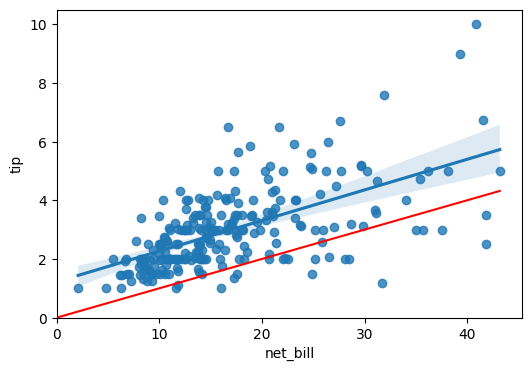

In [7]:
sns.regplot(y='tip',x='net_bill', data=tips[tips['tip_pct']<.5])
x = np.linspace(0,tips['net_bill'].max(),100)
y = .1*x
plt.plot(x, y, '-r', label='linha dos 10%')
plt.xlim(left = 0)
plt.ylim(bottom = 0)

### 2. ajuste o modelo de ```tip_pct``` em função do logaritmo de ```net_bill```.

In [10]:
model = smf.ols(formula='tip_pct ~ np.log(net_bill)', data=tips).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                tip_pct   R-squared:                       0.202
Model:                            OLS   Adj. R-squared:                  0.198
Method:                 Least Squares   F-statistic:                     61.16
Date:                Fri, 29 Sep 2023   Prob (F-statistic):           1.62e-13
Time:                        00:13:45   Log-Likelihood:                 123.81
No. Observations:                 244   AIC:                            -243.6
Df Residuals:                     242   BIC:                            -236.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            0.6181      0.054  

###  3. ajuste o modelo de ```tip_pct``` em função de um polinômio de segundo grau em ```net_bill```.

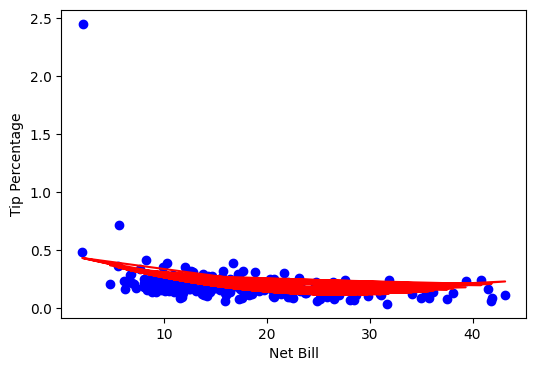

In [11]:
X = tips['net_bill'].values.reshape(-1, 1)
y = tips['tip_pct'].values.reshape(-1, 1)
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)
model = LinearRegression()
model.fit(X_poly, y)
plt.scatter(X, y, color='blue')
plt.plot(X, model.predict(X_poly), color='red')
plt.xlabel('Net Bill')
plt.ylabel('Tip Percentage')
plt.show()

###  4. ajuste um modelo no log do ```tip_pct``` em função de ```net_bill```. Calcule o $R^2$ também em ```tip_pct```

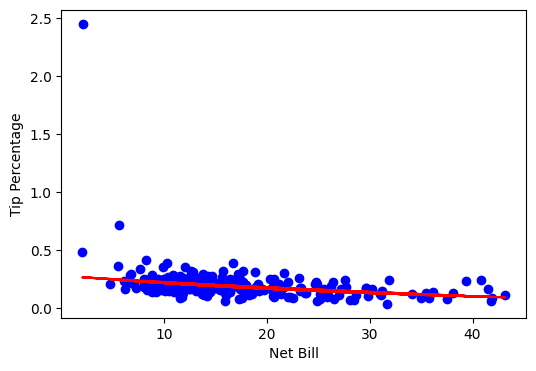

In [12]:
y_log = np.log(y)
model = LinearRegression()
model.fit(X, y_log)
R2 = model.score(X, y_log)
y_pred = np.exp(model.predict(X))
plt.scatter(X, y, color='blue')
plt.plot(X, y_pred, color='red')
plt.xlabel('Net Bill')
plt.ylabel('Tip Percentage')
plt.show()

###  5. ajuste um modelo no log do ```tip_pct``` em função do log de ```net_bill```. Calcule o $R^2$ também em ```tip_pct```.

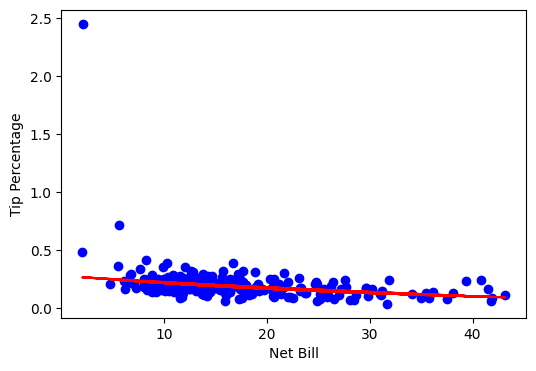

In [13]:
y_log = np.log(y)
model = LinearRegression()
model.fit(X, y_log)
R2 = model.score(X, y_log)
y_pred = np.exp(model.predict(X))
plt.scatter(X, y, color='blue')
plt.plot(X, y_pred, color='red')
plt.xlabel('Net Bill')
plt.ylabel('Tip Percentage')
plt.show()

###  6. qual modelo resultou no melhor ajuste?

## O modelo de melhor ajusto é o terceiro.